<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone: Network Traffic Classification

**Project notebooks:**<br>
1 - Data Import and Cleansing (current notebook)<br>
2 - [Exploratory Data Analysis](./02_EDA.ipynb)<br>
3 - [Preprocessing and Modeling](./03_Preprocessing_Modeling.ipynb)

## Background



## Problem Statement

The task is to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections.


## Datasets

The datasets are obtained from the University of New South Wales [here](https://research.unsw.edu.au/projects/unsw-nb15-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Import and prep raw dataset 

uncomment to run the import

In [ ]:
# #import raw data files
# df1= pd.read_csv("../dataset/UNSW_NB15_1.csv", header=None)
# df2= pd.read_csv("../dataset/UNSW_NB15_2.csv", header=None)
# df3= pd.read_csv("../dataset/UNSW_NB15_3.csv", header=None)
# df4= pd.read_csv("../dataset/UNSW_NB15_4.csv", header=None)

# #column names for raw dataset
# features = pd.read_csv("../dataset/UNSW_NB15_features.csv", encoding='cp1252')

In [ ]:
# features.info()

In [ ]:
# #extact the column names from feature
# col_names = features['Name'].tolist()
# col_names

In [ ]:
# #change column names to lower
# col_names = [word.lower() for word in col_names]
# col_names

In [ ]:
# #concatenate the 4 raw datasets
# combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True, axis=0)

In [ ]:
# combined_df.info()

In [ ]:
# #assign column names
# combined_df.columns = col_names
# #reanme col by removing extra space
# combined_df.rename(columns={'ct_src_ ltm': 'ct_src_ltm'}, inplace = True)

In [ ]:
# combined_df.info()

In [2]:
#save dataframe due to the large record size
filename = '../dataset/combined_df.pickle'

In [ ]:
# joblib.dump(combined_df, filename)

## Import combined dataframe for data cleaning

In [3]:
#load df
df = joblib.load(filename)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [5]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0


In [6]:
#check distribution of labels
df['label'].value_counts(normalize = True)

0    0.873513
1    0.126487
Name: label, dtype: float64

In [7]:
#check distribution of labels
df['attack_cat'].value_counts(normalize = True)

Generic             0.670689
Exploits            0.138585
 Fuzzers            0.059745
DoS                 0.050899
 Reconnaissance     0.038060
 Fuzzers            0.015721
Analysis            0.008332
Backdoor            0.005587
Reconnaissance      0.005475
 Shellcode          0.004009
Backdoors           0.001662
Shellcode           0.000694
Worms               0.000542
Name: attack_cat, dtype: float64

The dataset can be used for binary (`label`) or multi-class (`attack_cat`) classification problem. The dataset is serverely imbalance having normal traffic : attacks at 0.87: 0.13. The same is observed for the attack category where generic traffic is the majority class. However, we noted that the percentage of the generic traffic does not match up with the percentage of normal traffic. We will inspect the data further.

### a. remove all white spaces for string

In [8]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

### b. check for null

In [9]:
#check for null values
percent_null = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'count_null': df.isnull().sum(), 'percent_null': percent_null}).sort_values("percent_null", ascending = False).reset_index()
missing_value_df

,index,count_null,percent_null
0,sport,2474511,97.42
1,attack_cat,2218764,87.35
2,is_ftp_login,1429879,56.29
3,ct_flw_http_mthd,1348145,53.08
4,ct_ftp_cmd,1076833,42.39
5,dsport,945761,37.23
6,is_sm_ips_ports,0,0.00
7,djit,0,0.00
8,stime,0,0.00
9,ltime,0,0.00


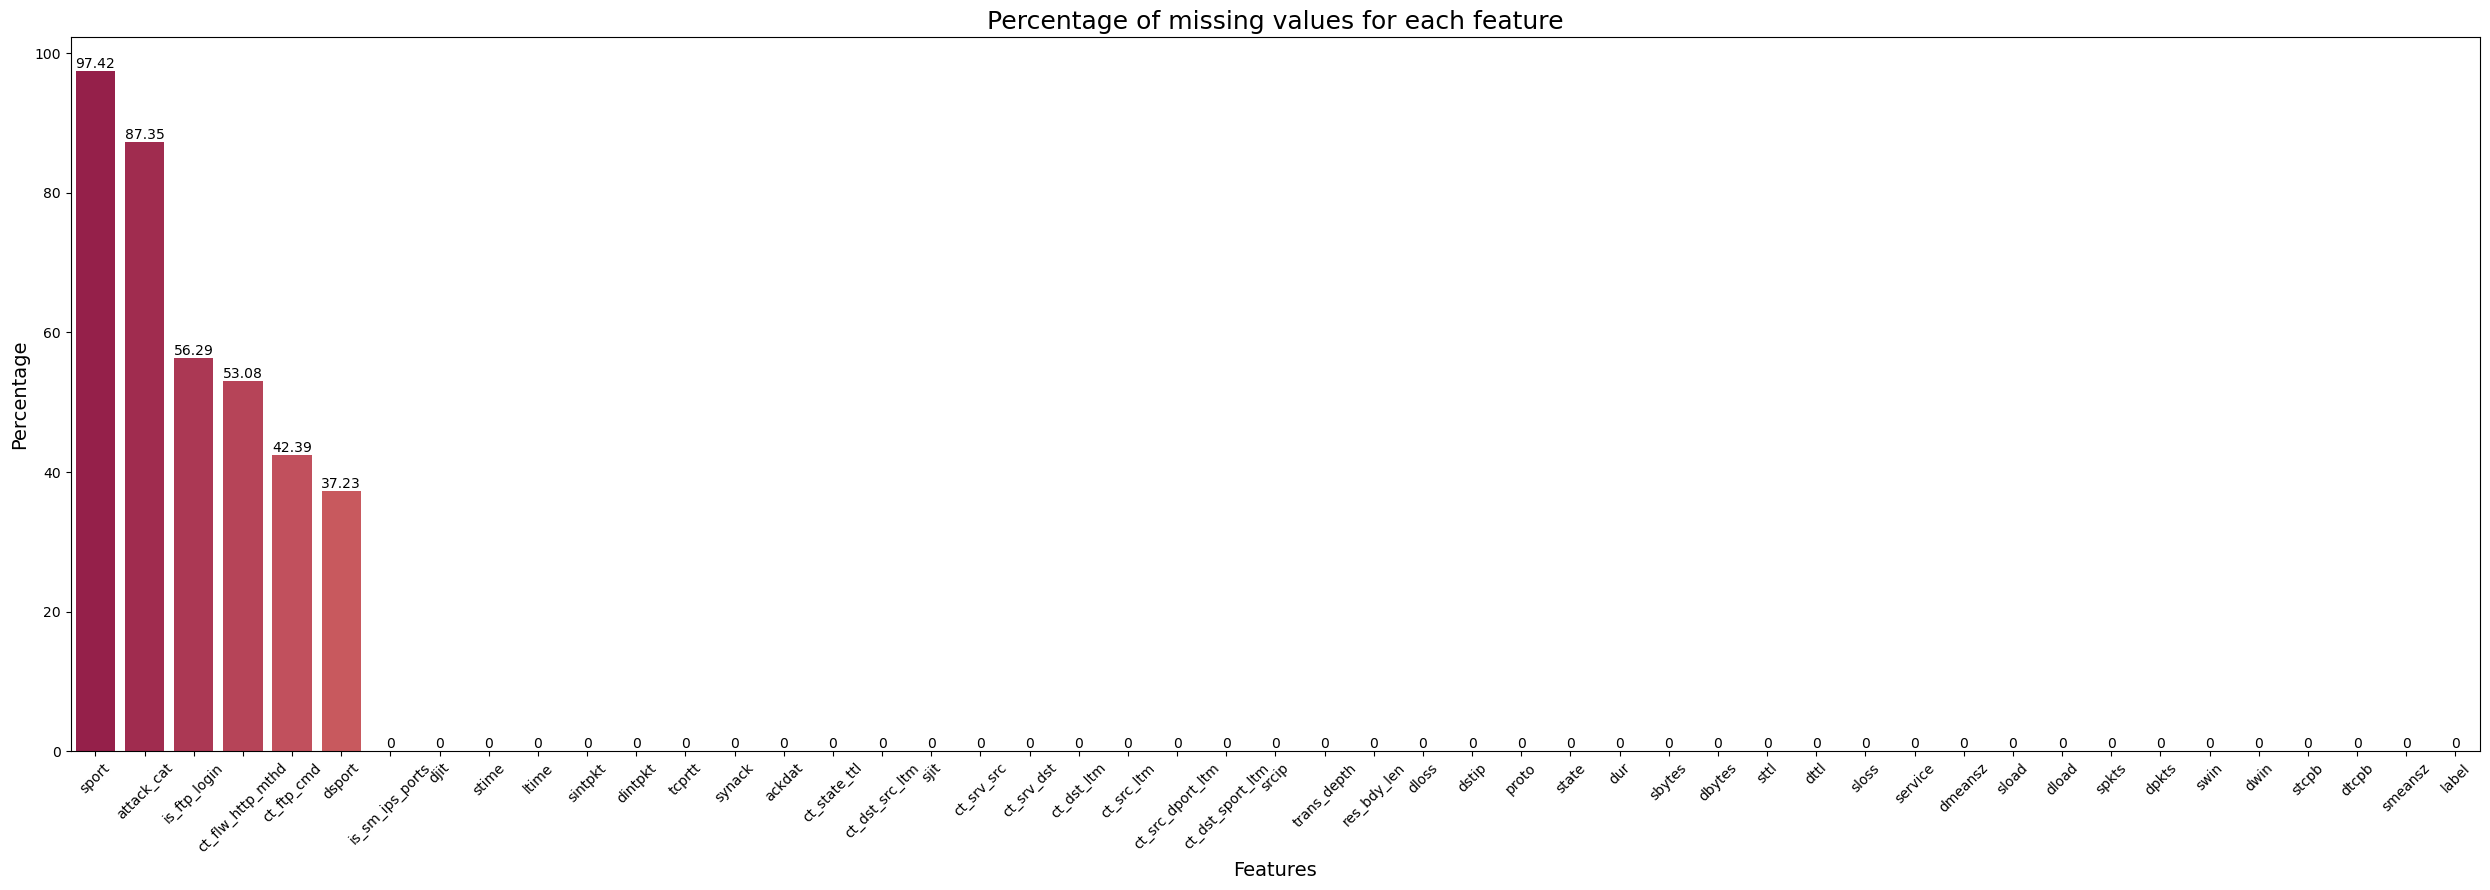

In [10]:
#assess the destination port numbers for each service type

#code for plotly
#uncomment to run
# null = px.bar(missing_value_df, x='index',y='percent_null', 
#                    title='Percentage of missing values for each feature')

# null.update_traces(marker_color='firebrick')
# null.show()

plt.figure(figsize = (25,9))

fig = sns.barplot(x='index',y='percent_null' ,data=missing_value_df, palette = 'Spectral')
plt.title('Percentage of missing values for each feature', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
fig.bar_label(fig.containers[0])
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

1. Source port number `sport` has more than 90% of missing values and this feature will be dropped.
2. Destination port number `dsport` is dependent on the services used. We will use `dsport` to impute missing service type with value `-` before dropping this feature.

### c. correct time features

In [11]:
#convert time features from seconds to datetime
df['stime'] = pd.to_datetime(df['stime'], unit='s')
df['ltime'] = pd.to_datetime(df['ltime'], unit='s')

In [12]:
df['sdate'] = df['stime'].dt.date.astype('datetime64[ns]')
df['stime'] = df['stime'].dt.time
df['ldate'] = df['ltime'].dt.date.astype('datetime64[ns]')
df['ltime'] = df['ltime'].dt.time

In [13]:
df[['sdate','ldate','stime','ltime']].dtypes

sdate    datetime64[ns]
ldate    datetime64[ns]
stime            object
ltime            object
dtype: object

### d. impute service based on available dsport

Whilst '-' indicates that there is not much used service, we can determine the services used based on the ports which are already assigned to the types of service used ([Source](https://www.iana.org/assignments/service-names-port-numbers/service-names-port-numbers.xhtml)). We will impute service for `-` based on available `dsport` and replace the remaining `-` with `none`.  

The number of 'none' has reduce from 1227189 to 1210065 indicating the traffic have been classified.

In [14]:
#count records by service
df['service'].value_counts()

-           1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: service, dtype: int64

In [15]:
#get the ports for each service
service_port = df.loc[(df['service']!= '-') & (df['dsport'].isnull() == False), ['dsport','service']].drop_duplicates().reset_index(drop = True)
service_port

,dsport,service
0,53,dns
1,80,http
2,8080,http
3,25,smtp
4,25740,ftp-data
...,...,...
1621,62003,http
1622,33532,http
1623,63537,ftp-data
1624,59546,ftp-data


In [16]:
#save the port for each service as dictionary
port_dict = dict(zip(service_port['dsport'], service_port['service']))
port_dict

{'53': 'dns',
 '80': 'http',
 '8080': 'http',
 '25': 'smtp',
 '25740': 'ftp-data',
 '11922': 'ftp-data',
 '23183': 'ftp-data',
 '21': 'ftp',
 '22': 'ssh',
 '56538': 'ftp-data',
 '6577': 'ftp-data',
 '54547': 'ftp-data',
 '110': 'pop3',
 '162': 'snmp',
 '65419': 'ftp-data',
 '161': 'snmp',
 '64551': 'ftp-data',
 '62999': 'ftp-data',
 '16000': 'http',
 '443': 'ssl',
 '56301': 'ftp-data',
 '57026': 'ftp-data',
 '60696': 'ftp-data',
 '1968': 'ftp-data',
 '33761': 'ftp-data',
 '40667': 'ftp-data',
 '58215': 'ftp-data',
 '29746': 'ftp-data',
 '30857': 'ftp-data',
 '50128': 'ftp-data',
 '54418': 'ftp-data',
 '52674': 'ftp-data',
 '631': 'http',
 '21700': 'http',
 '58459': 'ftp-data',
 '65185': 'ftp-data',
 '6667': 'irc',
 '58837': 'ftp-data',
 '2100': 'ftp',
 '64661': 'ftp-data',
 '65287': 'ftp-data',
 '8000': 'http',
 '32948': 'ftp-data',
 '29419': 'ftp-data',
 '4360': 'ftp-data',
 '42611': 'ftp-data',
 '23027': 'ftp-data',
 '41036': 'ftp-data',
 '59548': 'ftp-data',
 '49160': 'ftp-data',
 '

In [17]:
port_dict['16000']

'http'

In [18]:
#impute the service based on ports
for i in range(len(df)):
    if df['service'][i] == '-' and df['dsport'][i] != np.nan:
        try:
            df['service'][i] = port_dict[df['dsport'][i]]
        except:
            pass

/var/folders/bk/c5c57std6qdccz0ybl83899h0000gn/T/ipykernel_33222/2280966252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service'][i] = port_dict[df['dsport'][i]]


In [19]:
#replace value
df['service'] = df['service'].replace('-', 'none')

In [20]:
#count records by service
df['service'].value_counts()

none        1229068
dns          784160
http         209916
ftp-data     135090
smtp          82353
ftp           49443
ssh           47692
pop3           1626
dhcp            234
ssl             201
snmp            128
irc              88
radius           48
Name: service, dtype: int64

### e. impute missing attack_cat

In [21]:
#check the type of traffic based on label
df.loc[df['attack_cat'].isnull() == True]['label'].value_counts()

0    2218764
Name: label, dtype: int64

In [22]:
#since all the label with missing 'attack_cat' is 0 meaning normal traffic, fill missing values with 'normal'
df['attack_cat'] = df['attack_cat'].fillna('Normal')

In [23]:
#check that the distribution of attack_cat match up with the label
df[['attack_cat','label']].value_counts(normalize = True)

attack_cat      label
Normal          0        0.873513
Generic         1        0.084833
Exploits        1        0.017529
Fuzzers         1        0.009545
DoS             1        0.006438
Reconnaissance  1        0.005507
Analysis        1        0.001054
Backdoor        1        0.000707
Shellcode       1        0.000595
Backdoors       1        0.000210
Worms           1        0.000069
dtype: float64

In [24]:
#correct the category for backdoor and change all to lowercase
df['attack_cat'].replace("Backdoors", "Backdoor", inplace = True)
df['attack_cat'] = df['attack_cat'].apply(lambda x: x.lower())

### f. impute missing `is_ftp_login`
If the ftp session is accessed by user and password then 1 else 0.

In [25]:
df['is_ftp_login'].unique()

array([ 0.,  1., nan,  2.,  4.])

We noted that the max value for this feature is 4 which differs from the description in the data dictionary. We will change numbers greater than 1 to 1.

In [26]:
#change values greater than 1 to 1
df['is_ftp_login'] = df['is_ftp_login'].apply(lambda x : 1.0 if x > 0.0 else x)

In [27]:
#check values before impute
df.loc[df['is_ftp_login'].isnull() == False].groupby(['service','is_ftp_login'])['label'].count()

service   is_ftp_login
dhcp      0.0                  9
dns       0.0             195954
ftp       0.0               4589
          1.0              43575
ftp-data  0.0              63576
http      0.0              96243
irc       0.0                 14
none      0.0             642538
pop3      0.0                236
radius    0.0                  8
smtp      0.0              39516
snmp      0.0                 17
ssh       0.0              23863
ssl       0.0                 30
Name: label, dtype: int64

We noted that only ftp service have `is_ftp_login` records. A successful ftp login may indicate a normal traffic from a authorised user. Hence, we will impute 0 for all missing values to be prudent, so as not to wrongly assume the traffic with missing value is an authenticated traffic.

In [28]:
# impute 0 for 'is_ftp_login' 
df['is_ftp_login'] = df['is_ftp_login'].fillna(0.0)

In [29]:
#check values after impute
df['is_ftp_login'].isnull().sum()

0

### g. ct_ftp_cmd

Number of flows that has a command in ftp session. Only service == ftp should have value more than 0.

In [30]:
#check service type for values in 'ct_ftp_cmd'
df.loc[df['ct_ftp_cmd'].isnull() == False].groupby(['service','ct_ftp_cmd'])['label'].count().reset_index()

,service,ct_ftp_cmd,label
0,dhcp,,225
1,dns,,588206
2,dns,0,1907
3,ftp,,1279
4,ftp,0,31
5,ftp,1,22990
6,ftp,2,30
7,ftp,4,156
8,ftp-data,,71514
9,ftp-data,0,835


In [31]:
#replace blank with np.nan
df['ct_ftp_cmd'].replace("", np.nan, inplace = True)

In [32]:
#check values after replacement
df.loc[df['ct_ftp_cmd'].isnull() == False].groupby(['service','ct_ftp_cmd'])['label'].count().reset_index()

,service,ct_ftp_cmd,label
0,dns,0,1907
1,ftp,0,31
2,ftp,1,22990
3,ftp,2,30
4,ftp,4,156
5,ftp-data,0,835
6,http,0,946
7,irc,0,1
8,none,0,5838
9,smtp,0,435


We noted that only ftp service have `ct_ftp_cmd` records. We will impute 0 for `ct_ftp_cmd` if service not ftp.

In [33]:
#change values to int
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].apply(lambda x : float(x) if (type(x) != int or x != np.nan) else x)

In [34]:
#check service type for values in 'ct_ftp_cmd'
df.loc[df['ct_ftp_cmd'].isnull() == True]['service'].value_counts()

none        1223230
dns          782253
http         208970
ftp-data     134255
smtp          81918
ssh           47526
ftp           26236
pop3           1626
dhcp            234
ssl             201
snmp            128
irc              87
radius           48
Name: service, dtype: int64

In [35]:
# impute 0 for 'ct_ftp_cmd' if service not ftp
df.loc[df['service']!= 'ftp','ct_ftp_cmd'] = df.loc[df['service']!= 'ftp','ct_ftp_cmd'].fillna(0.0)

In [36]:
#check values after impute
df.loc[df['ct_ftp_cmd'].isnull() == True]['service'].value_counts()

ftp    26236
Name: service, dtype: int64

In [37]:
#check the mode and median value for ftp
display(df.loc[df['service'] == 'ftp', 'ct_ftp_cmd'].mode())
display(df.loc[df['service'] == 'ftp', 'ct_ftp_cmd'].median())

0    1.0
Name: ct_ftp_cmd, dtype: float64

1.0

In [38]:
#impute ftp missing value with the mode if 'is_ftp_login' == 1 else 0
df.loc[(df['service'] == 'ftp') & (df['is_ftp_login'] != 0), 'ct_ftp_cmd'] = df.loc[(df['service'] == 'ftp') & (df['is_ftp_login'] != 0), 'ct_ftp_cmd'].fillna(1.0)
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].fillna(0.0)

In [39]:
#check if there are still missing values
df['ct_ftp_cmd'].isnull().sum()

0

In [40]:
#check values after replacement
df.groupby(['service','ct_ftp_cmd','is_ftp_login'])['label'].count().reset_index()

,service,ct_ftp_cmd,is_ftp_login,label
0,dhcp,0.0,0.0,234
1,dns,0.0,0.0,784160
2,ftp,0.0,0.0,5868
3,ftp,1.0,1.0,43389
4,ftp,2.0,1.0,30
5,ftp,4.0,1.0,156
6,ftp-data,0.0,0.0,135090
7,http,0.0,0.0,209916
8,irc,0.0,0.0,88
9,none,0.0,0.0,1229068


### h. ct_flw_http_mthd

In [41]:
#check service type for values in 'ct_flw_http_mthd'
df.loc[df['ct_flw_http_mthd'].isnull() == False].groupby(['service','ct_flw_http_mthd'])['label'].count().reset_index()

,service,ct_flw_http_mthd,label
0,dhcp,0.0,9
1,dns,0.0,195954
2,ftp,0.0,25199
3,ftp-data,0.0,63576
4,http,0.0,5603
5,http,1.0,186052
6,http,2.0,584
7,http,3.0,248
8,http,4.0,6402
9,http,5.0,86


Based on the table above, `ct_flw_http_mthd` is `0.0` when services are not `http` or `none`. For traffic where `ct_flw_http_mthd` is greater than 0, we will impute `service` as `http`. 

In [42]:
# impute `http` for 'service' if 'ct_flw_http_mthd' is more than 0
df.loc[(df['service']== 'none') & (df['ct_flw_http_mthd'] > 0),'service'] = "http"

In [43]:
#check value after impute
df.loc[df['ct_flw_http_mthd'].isnull() == False].groupby(['service','ct_flw_http_mthd'])['label'].count().reset_index()

,service,ct_flw_http_mthd,label
0,dhcp,0.0,9
1,dns,0.0,195954
2,ftp,0.0,25199
3,ftp-data,0.0,63576
4,http,0.0,5603
5,http,1.0,188008
6,http,2.0,588
7,http,3.0,738
8,http,4.0,6564
9,http,5.0,430


In [44]:
#check service type for values in 'ct_flw_http_mthd'
df.loc[df['ct_flw_http_mthd'].isnull() == True]['service'].value_counts()

dns         588206
none        586524
ftp-data     71514
smtp         42837
ftp          24244
ssh          23829
http          8980
pop3          1390
dhcp           225
ssl            171
snmp           111
irc             74
radius          40
Name: service, dtype: int64

In [45]:
# impute 0 for 'ct_flw_http_mthd' if service not http
df.loc[df['service']!= 'http','ct_flw_http_mthd'] = df.loc[df['service']!= 'http','ct_flw_http_mthd'].fillna(0.0)

In [46]:
#check values after impute
df.loc[df['ct_flw_http_mthd'].isnull() == True]['service'].value_counts()

http    8980
Name: service, dtype: int64

In [47]:
#check the mode and median value for http
display(df.loc[df['service'] == 'http', 'ct_flw_http_mthd'].mode())
display(df.loc[df['service'] == 'http', 'ct_flw_http_mthd'].median())

0    1.0
Name: ct_flw_http_mthd, dtype: float64

1.0

In [48]:
#impute ftp missing value with the mode value
df.loc[df['service'] == 'http', 'ct_flw_http_mthd'] = df.loc[df['service'] == 'http', 'ct_flw_http_mthd'].fillna(1.0)

In [49]:
#check for missing values
df['service'].isnull().sum()

0

### i. is_sm_ips_ports

If source and destination IP addresses equal and port numbers equal then this variable takes value 1 else 0.

In [51]:
#check if there are other values other than 0 and 1
df['is_sm_ips_ports'].unique()

array([0, 1])

In [52]:
#check that is_sm_ips_ports' == 1 when 'srcip' == 'dstip'
df.loc[(df['srcip'] == df['dstip']) & (df['sport'] == df['dsport']), 'is_sm_ips_ports'].unique()

array([1])

In [53]:
#check that there is no record that has 'is_sm_ips_ports' == 1 and 'srcip' != 'dstip'
df.loc[(df['is_sm_ips_ports'] == 1) & (df['srcip'] != df['dstip'])]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label,sdate,ldate


### e. check for duplicates

- drop sport due to high number of missing values and dsport as it would not be meaningful
- drop `is_ftp_login` as there are values for `ct_ftp_cmd` when `is_ftp_login`is 0. Hence, there is no need for 2 features of the same information.

We check for duplicate records after imputing all the missing values to avoid premature dropping of rows.

In [60]:
df_nodups = df.drop(['sport', 'dsport', 'is_ftp_login'], axis = 1)

In [61]:
#drop duplicates based on all fields
df_nodups = df_nodups.drop_duplicates().reset_index(drop = True)

In [62]:
#check total number of records
print(f"Before: {len(df)}, After: {len(df_nodups)}")

Before: 2540047, After: 2057956


In [63]:
#export combined cleaned data
joblib.dump(df_nodups, '../dataset/clean.pickle')

['../dataset/clean.pickle']

In [64]:
#check the label distribution 
df_nodups['label'].value_counts(normalize = True)

0    0.951713
1    0.048287
Name: label, dtype: float64

In [65]:
#check the attack category distribution 
df_nodups['attack_cat'].value_counts(normalize = True)

normal            0.951713
exploits          0.013406
generic           0.012284
fuzzers           0.010515
reconnaissance    0.006490
dos               0.002750
analysis          0.001061
backdoor          0.000964
shellcode         0.000734
worms             0.000083
Name: attack_cat, dtype: float64

### Identify dataset to use

In [66]:
df_nodups['sdate'].value_counts()

2015-02-18    1035041
2015-01-22     988985
2015-01-23      33930
Name: sdate, dtype: int64

In [67]:
display(df_nodups.loc[df_nodups['sdate']=='2015-02-18']['label'].value_counts(normalize = True))
display(df_nodups.loc[df_nodups['sdate']=='2015-01-22']['label'].value_counts(normalize = True))
display(df_nodups.loc[df_nodups['sdate']=='2015-01-23']['label'].value_counts(normalize = True))

0    0.917747
1    0.082253
Name: label, dtype: float64

0    0.985603
1    0.014397
Name: label, dtype: float64

0    1.0
Name: label, dtype: float64

<Figure size 800x600 with 0 Axes>

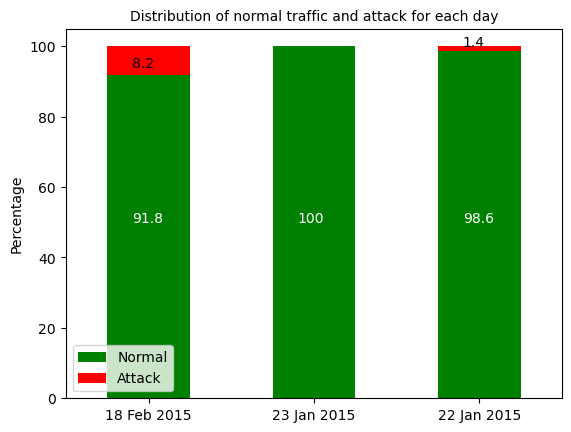

In [68]:
plt.figure(figsize = (8,6))

df = pd.DataFrame({'Normal': [91.8, 100, 98.6],
                   'Attack': [8.2, 0, 1.4]},
                  index=['18 Feb 2015', '23 Jan 2015', '22 Jan 2015'])
 
 
#create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['green', 'red'])

plt.xticks(rotation=0)
# labels for x & y axis
plt.ylabel('Percentage')
plt.text(-0.1, 50,'91.8',color = 'white')
plt.text(-0.1, 94,'8.2') 
plt.text(0.9, 50,'100',color = 'white')    
plt.text(1.9, 50,'98.6',color = 'white')
plt.text(1.9, 100,'1.4')

    
# title of plot
plt.title('Distribution of normal traffic and attack for each day', fontsize = 10)

plt.show()

In [69]:
#include only network traffic on 2015-02-18 as the data imbalance is not as servere
set0218 = df_nodups.loc[df_nodups['sdate']== '2015-02-18'].reset_index(drop = True)
len(set0218)

1035041

In [70]:
#export cleaned data
joblib.dump(set0218, '../dataset/set0218.pickle')

['../dataset/set0218.pickle']

In [71]:
#As the data set is huge, we will split the data into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(set0218, random_state=42, test_size=0.9)

In [72]:
len(train)

103504

In [73]:
len(test)

931537

In [74]:
#check to ensure the distribution of the columns to predict for train and test is the same
display(train['label'].value_counts(normalize = True))
display(test['label'].value_counts(normalize = True))

0    0.916409
1    0.083591
Name: label, dtype: float64

0    0.917896
1    0.082104
Name: label, dtype: float64

In [75]:
#save the file out
joblib.dump(train.reset_index(drop = True), '../dataset/train.pickle')
joblib.dump(test.reset_index(drop = True), '../dataset/test.pickle')

['../dataset/test.pickle']